In [1]:
# to do : check to make sure that the separation axis is consistent
# to do : remember that if you change the xlimits on the plot you need to make sure they are consistent for both axes!!!

In [5]:
# generate large number of initial conditions
from generate_inicon import *
n_files = 10000
inicon_list = []
n = 0
while n < n_files:
    inicons=initial_conditions()
    if inicons is not None:
        inicon_list.append(inicons)
        n += 1

In [6]:
# store values for plots
a2vals=[];m3vals=[]
a1vals=[]
e1vals=[];e2vals=[]
delta_avals=[]
for inicons in inicon_list:
    a2vals.append(inicons[-7])
    m3vals.append(inicons[2])
    a1vals.append(inicons[-8])
    e1vals.append(inicons[-6])
    e2vals.append(inicons[-5])
    delta_avals.append(inicons[-7]-inicons[-8])

(array([  72.,  103.,  167.,  498., 1690., 1683., 1672., 1639., 1444.,
        1032.]),
 array([0.00399894, 0.31795703, 0.63191512, 0.94587321, 1.2598313 ,
        1.57378939, 1.88774748, 2.20170557, 2.51566366, 2.82962175,
        3.14357984]),
 <a list of 10 Patch objects>)

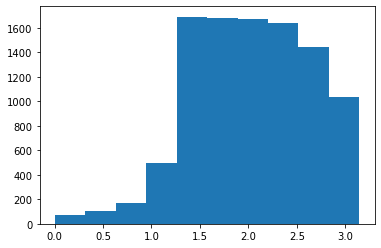

In [7]:
plt.hist(delta_avals)

Text(0.5, 0, 'np.log10($\\epsilon$)')

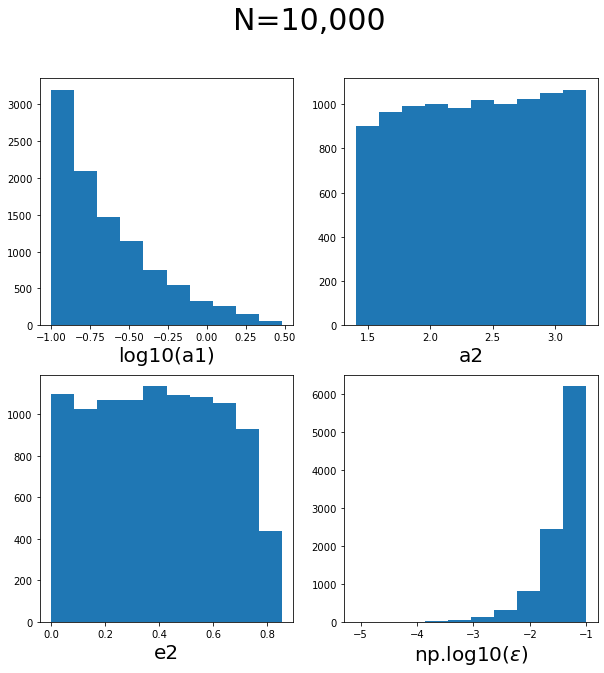

In [8]:
# plot histograms of different parameters as a check
plt.figure(figsize = (10,10))
plt.suptitle('N=10,000',fontsize=30)

plt.subplot(221)
plt.hist(np.log10(a1vals))
plt.xlabel('log10(a1)',fontsize=20)

plt.subplot(222)
plt.hist(a2vals)
plt.xlabel('a2',fontsize=20)

plt.subplot(223)
plt.hist(e2vals)
plt.xlabel('e2',fontsize=20)

epsilon_vals = []
for i in range(len(inicon_list)):
    inicons = inicon_list[i]
    a1 = inicons[-8]
    a2 = inicons[-7]
    e2 = inicons[-5]
    if a2<a1:
        print('a2<a1')
    epsilon = (a1/a2)*(e2/(1-e2**2.))
    epsilon_vals.append(epsilon)
    
plt.subplot(224)
plt.hist(np.log10(epsilon_vals))
plt.xlabel('np.log10($\epsilon$)',fontsize=20)

In [ ]:
# overplot initial conditions onto parameter space plot
from Kepler1656_companion_parameter_space import *

# plot mass, separation (AU)
fig,ax=plt.subplots(1,2,figsize=(15,6))

# AO data
ax[0].fill_between(AO_sma,AO_mass,10,alpha=0.3,color='lightpink', hatch='////',
                label='Keck AO')

# Speckle data
ax[0].fill_between(Speckle_sma,Speckle_mass,10,alpha=0.3,color='coral', hatch='////',
               label='Speckle')

# GAIA data
ax[0].fill_between([GAIA_sep, 1e5], [GAIA_mass,GAIA_mass], 10, alpha=0.3, color='khaki', hatch='///',
               label='Astrometry')

# RV data
#ax.fill_between(RV_sma,RV_mass,10,alpha=0.3,color='lightblue', hatch='///',
#               label='Radial Velocities')

# plot Kepler-1656b
ax[0].plot(0.197, 48.6*Mearth/Msun, 'y.', markersize=10, markeredgecolor='k')
ax[0].annotate('Kepler-1656b',(0.005,3e-4))
# set labels
ax[0].set_xlabel('companion separation (au)',fontsize=12,family='serif')
ax[0].set_ylabel('companion mass ($M_\odot$)',fontsize=12,family='serif')
ax[0].legend(loc='lower right')

# plot simulation initial conditions
ax[0].plot(a2vals,m3vals,'.',color='rosybrown')
# limits and scales
ax[0].set_xscale('log')
#ax[0].set_xlim(0.01,1e4)
ax[0].set_yscale('log')
ax[0].set_ylim(1e-5,10)

# second x axis for separation
ax2 = ax[0].twiny()
ax2.plot(au2arcsec(AO_sma, system_distance), 3*np.ones(len(AO_sma)), alpha=0)
ax2.tick_params(axis='x', direction='in', which='both')
ax2.set_xscale('log')
ax2.set_xlabel('companion separation (arcsec)', fontsize=12, family='serif')

# ================================================================
# plot Kepler-1656b
ax[1].plot(0.197, 48.6*Mearth/Msun, 'y.', markersize=10, markeredgecolor='k')
ax[1].annotate('Kepler-1656b',(0.2,3e-4))
# set labels
ax[1].set_xlabel('companion separation (au)',fontsize=12,family='serif')
ax[1].set_ylabel('companion mass ($M_\odot$)',fontsize=12,family='serif')

# plot simulation initial conditions
ax[1].plot(a2vals,m3vals,'.',color='rosybrown')
# limits and scales
#ax.set_xscale('log')
#ax[1].set_xlim(0.05,6)
ax[1].set_yscale('log')
ax[1].set_ylim(1e-5,0.1)

# plot limits
ax[1].axvline(1.4,color='k',linestyle='--',label='P=600 days')
ax[1].axvline(3.25,color='r',linestyle='--',label='P=2100 days')
ax[1].axhline(0.0019,color='b',linestyle='--',label='M=$2M_{jup}$')
ax[1].axhline(0.1*48.6*Mearth/Msun,color='g',linestyle='--',label='M=$0.1M_{inner}$')
#ax[1].legend(loc='lower right')

ax[1].text(0.8,2e-5,'M=$0.1M_{inner}$',color='g')
ax[1].text(0.8,2.7e-3,'M=$2M_{jup}$',color='b')
ax[1].text(0.8,0.06,'P=600 days',color='k')
ax[1].text(2.6,0.06,'P=2100 days',color='r')

# second x axis for separation
ax3 = ax[1].twiny()
ax3.plot(au2arcsec(AO_sma, system_distance), 3*np.ones(len(AO_sma)), alpha=0)
ax3.tick_params(axis='x', direction='in', which='both')
ax3.set_xscale('log')
ax3.set_xlabel('companion separation (arcsec)', fontsize=12, family='serif')

Text(0.5, 0, 'companion separation (arcsec)')